# **AMAZON EDA & SENTIMENT ANALYSIS**

## **About The DataSet**

This dataset contains more than 1000 real products that are listed on the Amazon marketplace in India, as evidenced by the currency used in the dataset being Indian Rupees. 

Data explanation provided:

* **product_id:** Product ID
* **product_name:** Name of the Product
* **category:** Category of the Product
* **discounted_price:** Discounted Price of the Product
* **actual_price:** Actual Price of the Product
* **discount_percentage:** Percentage of Discount for the Product
* **rating:** Rating of the Product
* **rating_count:** Number of people who voted for the Amazon rating
* **about_product:** Description about the Product
* **user_id:** ID of the user who wrote review for the Product
* **user_name:** Name of the user who wrote review for the Product
* **review_id:** ID of the user review
* **review_title:** Short review
* **review_content:** Long review
* **img_link:** Image Link of the Product
* **product_link:** Official Website Link of the Product

The objective is to clean and prepare the data, as it is currently unorganized, and then analyze the data to gain insights and presented through visualizations.

## **Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# LOADING THE DATA

df = pd.read_csv("amazon.csv")
print("\n\nThe shape of the DataSet is{}\n".format(df.shape))
df



The shape of the DataSet is(1465, 16)



,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

## **Understanding The Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [4]:
df.describe(include = "O").transpose()

,count,unique,top,freq
product_id,1465,1351,B07JW9H4J1,3
product_name,1465,1337,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
category,1465,211,Computers&Accessories|Accessories&Peripherals|...,233
discounted_price,1465,550,₹199,53
actual_price,1465,449,₹999,120
discount_percentage,1465,92,50%,56
rating,1465,28,4.1,244
rating_count,1463,1143,"9,378",9
about_product,1465,1293,[CHARGE & SYNC FUNCTION]- This cable comes wit...,6
user_id,1465,1194,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10


In [5]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

## **Data Cleaning**

In [6]:
# LOKING FOR UNUSUAL CHARACTERS
df["rating"].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [7]:
# UNUSUAL STRING IN THE RATING COLUMN
df["rating"].value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

In [8]:
df.query("rating == '|'")

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In the Amazon page the product with that product_id has a rating of 4

In [9]:
# CHANGING DATA TYPES AND REPLACING CHARACTERS

df["discounted_price"] = df["discounted_price"].str.replace("₹","").str.replace(",","").astype("float64")
df["actual_price"] = df["actual_price"].str.replace("₹","").str.replace(",","").astype("float64")
df["rating_count"] = df["rating_count"].str.replace(",", "").astype("float64")
df["rating"] = df["rating"].str.replace("|", "4.0").astype("float64")
df["discount_percentage"] = df["discount_percentage"].str.replace("%", "").astype("float64")
df["discounted_price"] = df["discounted_price"] / 100

In [10]:
# CHEKING DUPLICATE DATA

df.duplicated().value_counts()

False    1465
dtype: int64

In [11]:
# LOKING FOR MISSING DATA

df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [12]:
# DEALING WITH MISSING DATA

df = df.dropna()
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [13]:
# NEW DATAFRAME WITH THE TARGET COLUMNS

dfc = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()
dfc.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,3.99,1099.0,64.0,4.2,24269.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,1.99,349.0,43.0,4.0,43994.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,1.99,1899.0,90.0,3.9,7928.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,3.29,699.0,53.0,4.2,94363.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,1.54,399.0,61.0,4.2,16905.0


In [14]:
# SPLITTING THE CATEGORY COLUMN

cat = df["category"].str.split("|", expand = True)
cat.head()

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None


In [15]:
dfc.drop(columns = "category", inplace = True)

In [16]:
# RENAMING THE COLOMUNS 

cat = cat.rename(columns = {0:"category", 1:"subcategory"})

# ADDING THE COLUMNS TO THE NEW DATAFRAME

dfc["category"] = cat["category"]
dfc["subcategory"] = cat["subcategory"]

In [17]:
# FIXING STRINGS IN CATEGORY AND SUBCATEGORY COLUMNS

dfc["category"] = dfc["category"].str.replace("&", " & ").str.replace("OfficeProducts", "Office Products").str.replace("MusicalInstruments","Musical Instruments").str.replace("HomeImprovement","Home Improvement")
dfc["subcategory"] = dfc["subcategory"].str.replace("&", " & ").str.replace(",", ", ").str.replace("HomeAppliances","Home Appliances").str.replace("AirQuality","Air Quality").str.replace("WearableTechnology", " Wearable Technology ").str.replace("NetworkingDevices", "Networking Devices").str.replace("OfficePaperProducts","Office Paper Products").str.replace("ExternalDevices","External Devices").str.replace("DataStorage", "Data Storage").str.replace("HomeStorage", "Home Storage").str.replace("HomeAudio","Home Audio").str.replace("GeneralPurposeBatteries","General Purpose Batteries").str.replace("BatteryChargers", " Battery Chargers ").str.replace("CraftMaterials", "Craft Materials").str.replace("OfficeElectronics","Office Electronics").str.replace("PowerAccessories","Power Accessories").str.replace("CarAccessories","Car Accessories").str.replace("HomeMedicalSupplies", "Home Medical Supplies").str.replace("HomeTheater", "Home Theater")

In [18]:
dfc.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category,subcategory
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,3.99,1099.0,64.0,4.2,24269.0,Computers & Accessories,Accessories & Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,1.99,349.0,43.0,4.0,43994.0,Computers & Accessories,Accessories & Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,1.99,1899.0,90.0,3.9,7928.0,Computers & Accessories,Accessories & Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,3.29,699.0,53.0,4.2,94363.0,Computers & Accessories,Accessories & Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,1.54,399.0,61.0,4.2,16905.0,Computers & Accessories,Accessories & Peripherals


In [19]:
# REMOVING WHITESPACE THE PRODUCT_ID COLUMN

dfc["product_id"].str.strip()

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1460    B08L7J3T31
1461    B01M6453MB
1462    B009P2LIL4
1463    B00J5DYCCA
1464    B01486F4G6
Name: product_id, Length: 1463, dtype: object

In [20]:
# CATEGORIZATION OF RANKINGS

rs = []
for s in dfc["rating"]:
    if s == 5.0 : 
        rs.append("Excellent")
    elif s < 5.0 and s >= 4.0: 
        rs.append("Above Average")
    elif s < 4.0 and s >= 3.0: 
        rs.append("Average")
    elif s < 3.0 and s >= 2.0: 
        rs.append("Below Average")
    else: 
        rs.append("Low Grade")

dfc["rating_score"] = rs
dfc["rating_score"] = dfc["rating_score"].astype("category")
dfc["final_price"] = dfc["actual_price"] - dfc["discounted_price"]
dfc["final_price"] = dfc["final_price"].astype("float64")

dfc.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category,subcategory,rating_score,final_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,3.99,1099.0,64.0,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,1095.01
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,1.99,349.0,43.0,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average,347.01
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,1.99,1899.0,90.0,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average,1897.01
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,3.29,699.0,53.0,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average,695.71
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,1.54,399.0,61.0,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average,397.46


In [21]:
dfc['rating_score'] = dfc['rating_score'].cat.reorder_categories(['Excellent', 'Above Average', 'Average', 'Below Average'], ordered=True)

## **Data Analysis**

To get a clearer and more visual idea of which subcategory belongs to which category we will make use of a pivot table using the columns "category", "subcategory" and "product_d".

In [22]:
# CATEGORY PIVOT TABLE

col = dfc[["category", "subcategory", "product_id"]]
col = col.rename(columns = {"category" : "Category", "subcategory" : "Subcategory", "product_id" : "Product_id"})

table = pd.pivot_table(col, index = ["Category", "Subcategory"], aggfunc = "count")
table

Product_id
Category                Subcategory                                               
Car & Motorbike         Car Accessories                                          1
Computers & Accessories Accessories & Peripherals                              379
                        Components                                               5
                        External Devices & Data Storage                         18
                        Laptops                                                  1
                        Monitors                                                 2
                        Networking Devices                                      34
                        Printers, Inks & Accessories                            11
                        Tablets                                                  1
Electronics              Wearable Technology                                    76
                        Accessories                                             14
                        Cameras & Photography                                   16
                        General Purpose Batteries &  Battery Chargers           14
                        Headphones, Earbuds & Accessories                       66
                        Home Audio                                              16
                        Home Theater, TV & Video                               162
                        Mobiles & Accessories                                  161
                        Power Accessories                                        1
Health & PersonalCare   Home Medical Supplies & Equipment                        1
Home & Kitchen          Craft Materials                                          7
                        Heating, Cooling & Air Quality                         116
                        Home Storage & Organization                             16
                        Kitchen & Dining                                         1
                        Kitchen & Home Appliances                              308
Home Improvement        Electrical                                               2
Musical Instruments     Microphones                                              2
Office Products         Office Electronics                                       4
                        Office Paper Products                                   27
Toys & Games            Arts & Crafts                                            1

Lests make some visualizations that will allow us to know the sales behavior by category and subcategory.

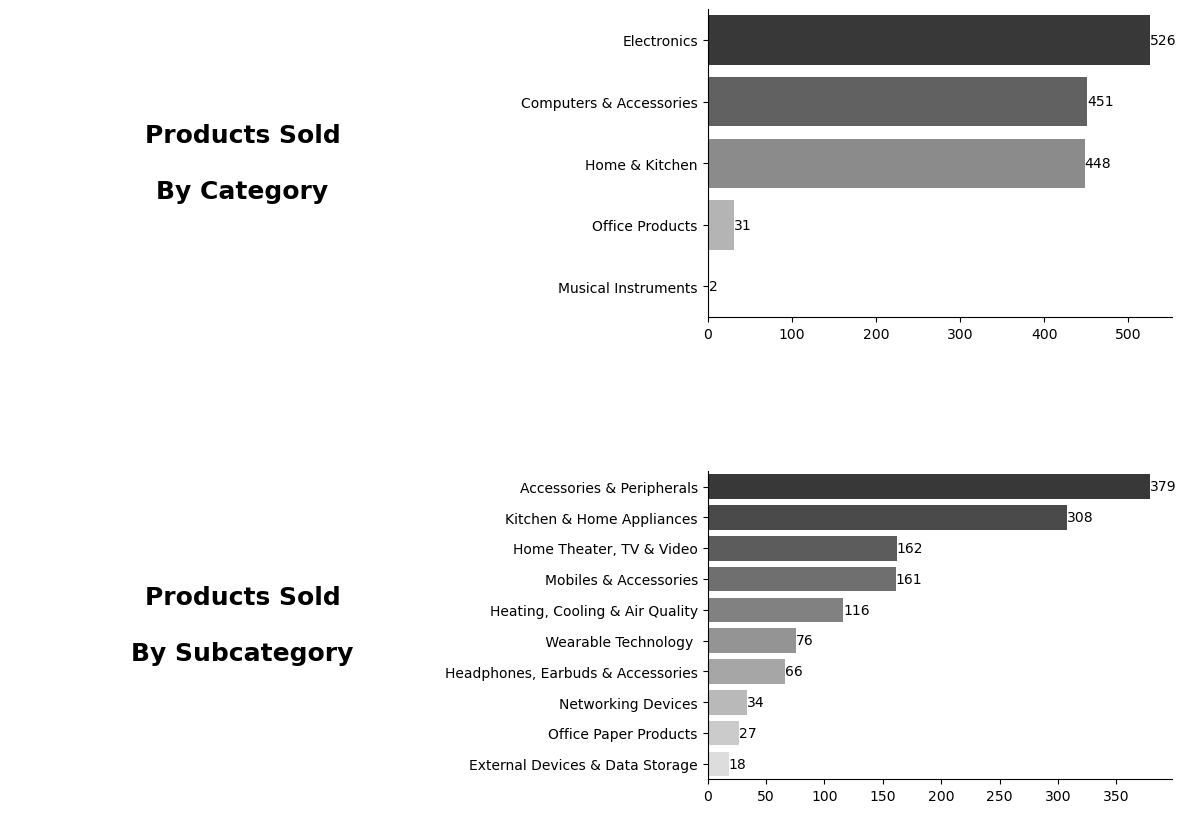

In [23]:
# VARIABLES

cat = dfc["category"].value_counts().head(5).rename_axis("category").reset_index(name = "count")
sub = dfc["subcategory"].value_counts().head(10).rename_axis("subcategory").reset_index(name = "count")

# POSSITION

fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(nrows = 2, ncols = 2, hspace = 0.5, wspace = 0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

# BACKGROUND

background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)

# TITLE 1

ax0.text(0.5, 0.5,
         "Products Sold\n\nBy Category",
         fontsize = 18,
         fontweight = "bold",        
         horizontalalignment = 'center',
         verticalalignment = 'center')
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, bottom = False)

# CATEGORY

sns.barplot(data = cat, x = "count", y = "category", palette = sns.blend_palette(["#383838", "#DDDDDD"], n_colors = 5), ax = ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_ylabel("")
ax1.set_xlabel("")

# TITLE 2
ax2.text(0.5, 0.5,
         "Products Sold\n\nBy Subcategory",
         fontsize = 18,
         fontweight = "bold",
         horizontalalignment = "center",
         verticalalignment = "center")
ax2.set(xticks = [], yticks = [])
ax2.tick_params(left = False, right = False)

# SUBCATEGORY

sns.barplot(data = sub, x = "count", y = "subcategory", palette = sns.blend_palette(["#383838", "#DDDDDD"], n_colors = 10), ax = ax3)
ax3.bar_label(ax3.containers[0])
ax3.set_ylabel("")
ax3.set_xlabel("")

for i in ["top", "right", "bottom", "left"]:
    ax0.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)

for i in ["top", "right"]:
    ax1.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

The majority of products in this dataset are related to electronics, particularly accessories & peripherals, as well as kitchen and home appliances. Overall, this dataset predominantly features products that are closely associated with electrical devices.

Let's see how the products are distributed in the subcategories of each category

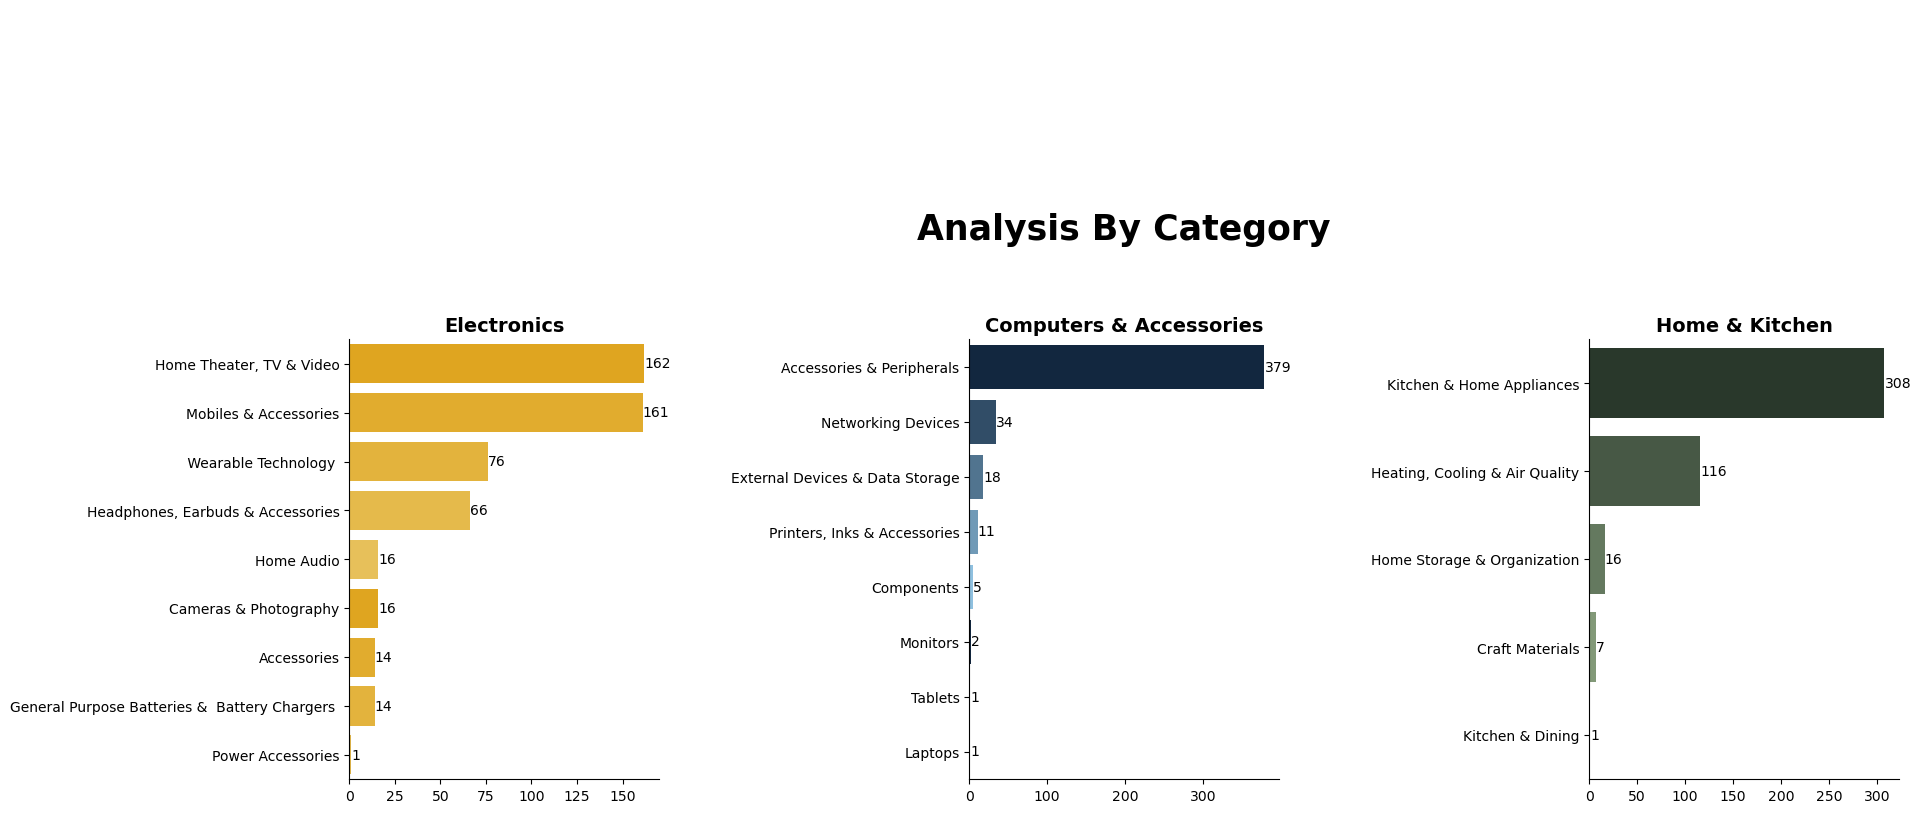

In [24]:
# VARIABLES

elc = dfc[dfc["category"] == "Electronics"]
com = dfc[dfc["category"] == "Computers & Accessories"]
hom = dfc[dfc["category"] == "Home & Kitchen"]

elc = elc["subcategory"].value_counts().rename_axis("subcategory").reset_index(name = "count")
com = com["subcategory"].value_counts().rename_axis("subcategory").reset_index(name = "count")
hom = hom["subcategory"].value_counts().rename_axis("subcategory").reset_index(name = "count")

# POSITION

fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(nrows = 2, ncols = 3, hspace = -.25, wspace = 1)
ax0 = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])

# BACKGROUND

bakground = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)

# TITLE

ax0.text(0.5, 0.5,
        "Analysis By Category",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)

# ELECTRONICS
ax1.set_title("Electronics", fontsize = 14, fontweight = "bold", loc = "center")
sns.barplot(data = elc, x = "count", y = "subcategory", palette = sns.blend_palette(["#FFB200", "#FFCB42"], n_colors = 5), ax = ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_ylabel("")
ax1.set_xlabel("")

# COMPUTERS & ACCESSORIES

ax2.set_title("Computers & Accessories", fontsize = 14, fontweight = "bold", loc = "center")
sns.barplot(data = com, x = "count", y = "subcategory", palette = sns.blend_palette(["#0A2647", "#82C3EC"], n_colors = 5), ax = ax2)
ax2.bar_label(ax2.containers[0])
ax2.set_ylabel("")
ax2.set_xlabel("")

# Home & Kitchen
ax3.set_title("Home & Kitchen", fontsize = 14, fontweight = "bold", loc = "center")
sns.barplot(data = hom, x = "count", y = "subcategory", palette = sns.blend_palette(["#263A29", "#9DC08B"], n_colors = 5), ax = ax3)
ax3.bar_label(ax3.containers[0])
ax3.set_ylabel("")
ax3.set_xlabel("")

for i in ["top", "left", "bottom", "right"]:
    ax0.spines[i].set_visible(False)

for i in ["top", "right"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

plt.show()

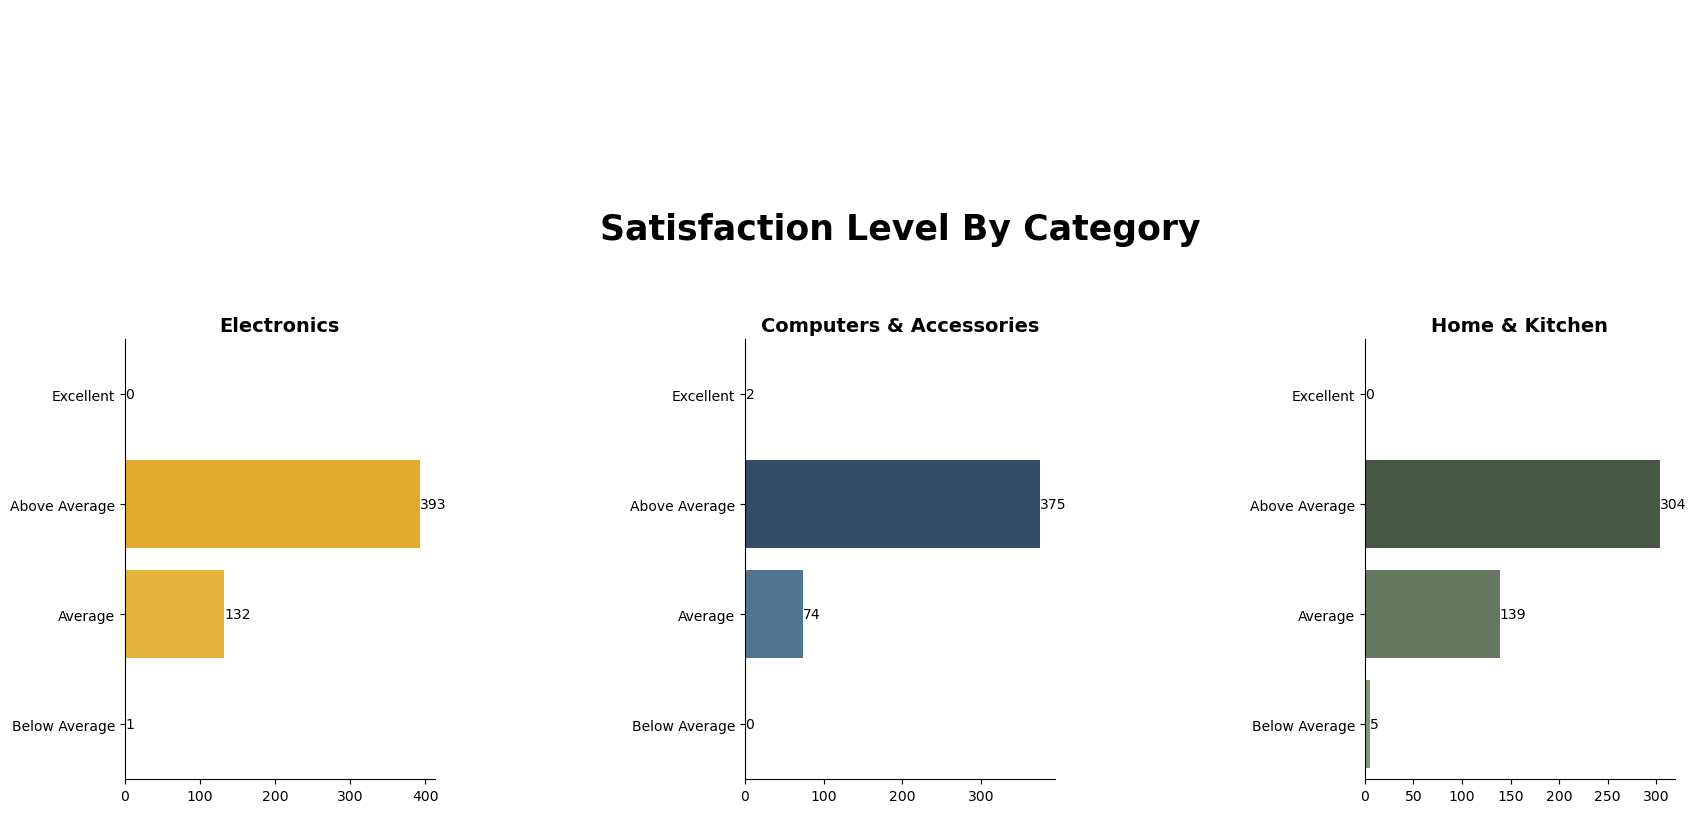

In [25]:
# VARIABLES

elc = dfc[dfc["category"] == "Electronics"]
com = dfc[dfc["category"] == "Computers & Accessories"]
hom = dfc[dfc["category"] == "Home & Kitchen"]

elc = elc["rating_score"].value_counts().rename_axis("rating_score").reset_index(name = "count")
com = com["rating_score"].value_counts().rename_axis("rating_score").reset_index(name = "count")
hom = hom["rating_score"].value_counts().rename_axis("rating_score").reset_index(name = "count")

# POSITION

fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(nrows = 2, ncols = 3, hspace = -.25, wspace = 1)
ax0 = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])

# BACKGROUND

background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)

# TITLE
ax0.text(0.5, 0.5,
        "Satisfaction Level By Category",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)

# ELECTRONICS
ax1.set_title("Electronics", fontsize = 14, fontweight = "bold", loc = "center")
sns.barplot(data = elc, x = "count", y = "rating_score", palette = sns.blend_palette(["#FFB200", "#FFCB42"], n_colors = 5), ax = ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_ylabel("")
ax1.set_xlabel("")

# COMPUTERS & ACCESSORIES

ax2.set_title("Computers & Accessories", fontsize = 14, fontweight = "bold", loc = "center")
sns.barplot(data = com, x = "count", y = "rating_score", palette = sns.blend_palette(["#0A2647", "#82C3EC"], n_colors = 5), ax = ax2)
ax2.bar_label(ax2.containers[0])
ax2.set_ylabel("")
ax2.set_xlabel("")

# Home & Kitchen
ax3.set_title("Home & Kitchen", fontsize = 14, fontweight = "bold", loc = "center")
sns.barplot(data = hom, x = "count", y = "rating_score", palette = sns.blend_palette(["#263A29", "#9DC08B"], n_colors = 5), ax = ax3)
ax3.bar_label(ax3.containers[0])
ax3.set_ylabel("")
ax3.set_xlabel("")

for i in ["top", "left", "bottom", "right"]:
    ax0.spines[i].set_visible(False)

for i in ["top", "right"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)


Broadly speaking, the categories with the largest market share tend to have above-average levels of customer satisfaction. Nevertheless, it is crucial to examine how this above-average satisfaction level is distributed among the various subcategories within those larger categories.

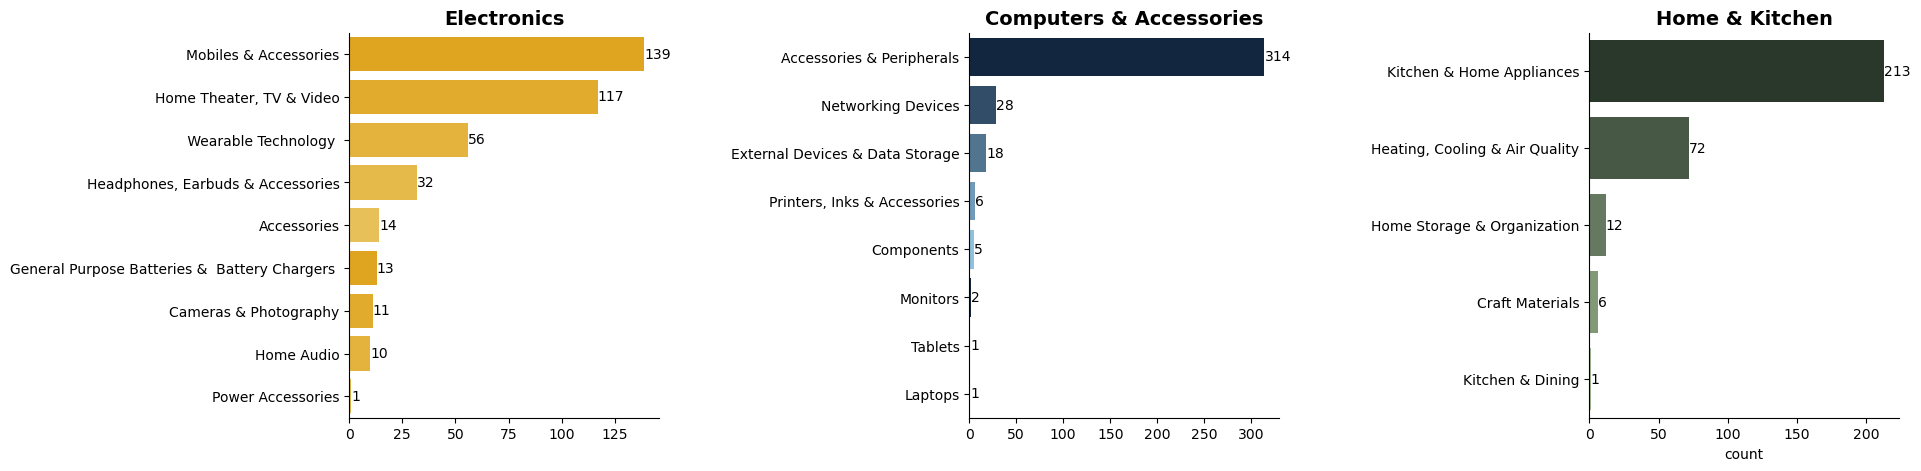

In [26]:
# VARIABLES
df_c = dfc[dfc["rating_score"] == "Above Average"]
elc = df_c[df_c["category"] == "Electronics"]
com = df_c[df_c["category"] == "Computers & Accessories"]
hom = df_c[df_c["category"] == "Home & Kitchen"]

elc = elc["subcategory"].value_counts().rename_axis("subcategory").reset_index(name = "count")
com = com["subcategory"].value_counts().rename_axis("subcategory").reset_index(name = "count")
hom = hom["subcategory"].value_counts().rename_axis("subcategory").reset_index(name = "count")

# POSITION
fig = plt.figure(figsize = (20,5))
gs = fig.add_gridspec(nrows = 1, ncols = 3, hspace = 0, wspace = 1)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)

# ELECTRONICS
ax0.set_title("Electronics", fontsize = 14, fontweight = "bold", loc = "center")
sns.barplot(data = elc, x = "count", y = "subcategory", palette = sns.blend_palette(["#FFB200", "#FFCB42"], n_colors = 5), ax = ax0)
ax0.bar_label(ax0.containers[0])
ax0.set_ylabel("")
ax0.set_xlabel("")

# COMPUTERS & ACCESSORIES

ax1.set_title("Computers & Accessories", fontsize = 14, fontweight = "bold", loc = "center")
sns.barplot(data = com, x = "count", y = "subcategory", palette = sns.blend_palette(["#0A2647", "#82C3EC"], n_colors = 5), ax = ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_ylabel("")
ax1.set_xlabel("")

# Home & Kitchen
ax2.set_title("Home & Kitchen", fontsize = 14, fontweight = "bold", loc = "center")
sns.barplot(data = hom, x = "count", y = "subcategory", palette = sns.blend_palette(["#263A29", "#9DC08B"], n_colors = 5), ax = ax2)
ax2.bar_label(ax2.containers[0])
ax2.set_ylabel("")
ax3.set_xlabel("")

for i in ["top", "right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)


The two most significant subcategories in each category contribute approximately 53%, 75%, and 78% of the above-average satisfaction level for that category. If we consider the total number of products in each subcategory against the number of products with above-average satisfaction levels, we see that these subcategories have 65%, 68%, and 56% above-average satisfaction levels. It is worth noting that less significant subcategories also have similar or even higher percentages, such as Computers & Accessories and Home & Kitchen. However, their impact is not as significant due to the smaller number of products they represent. In the Electronics category, we can observe a similar trend, where out of a total of 203 products, 119 have above-average satisfaction levels, resulting in a 58% satisfaction rate above average, which is comparable to the percentage represented by the two most significant subcategories.

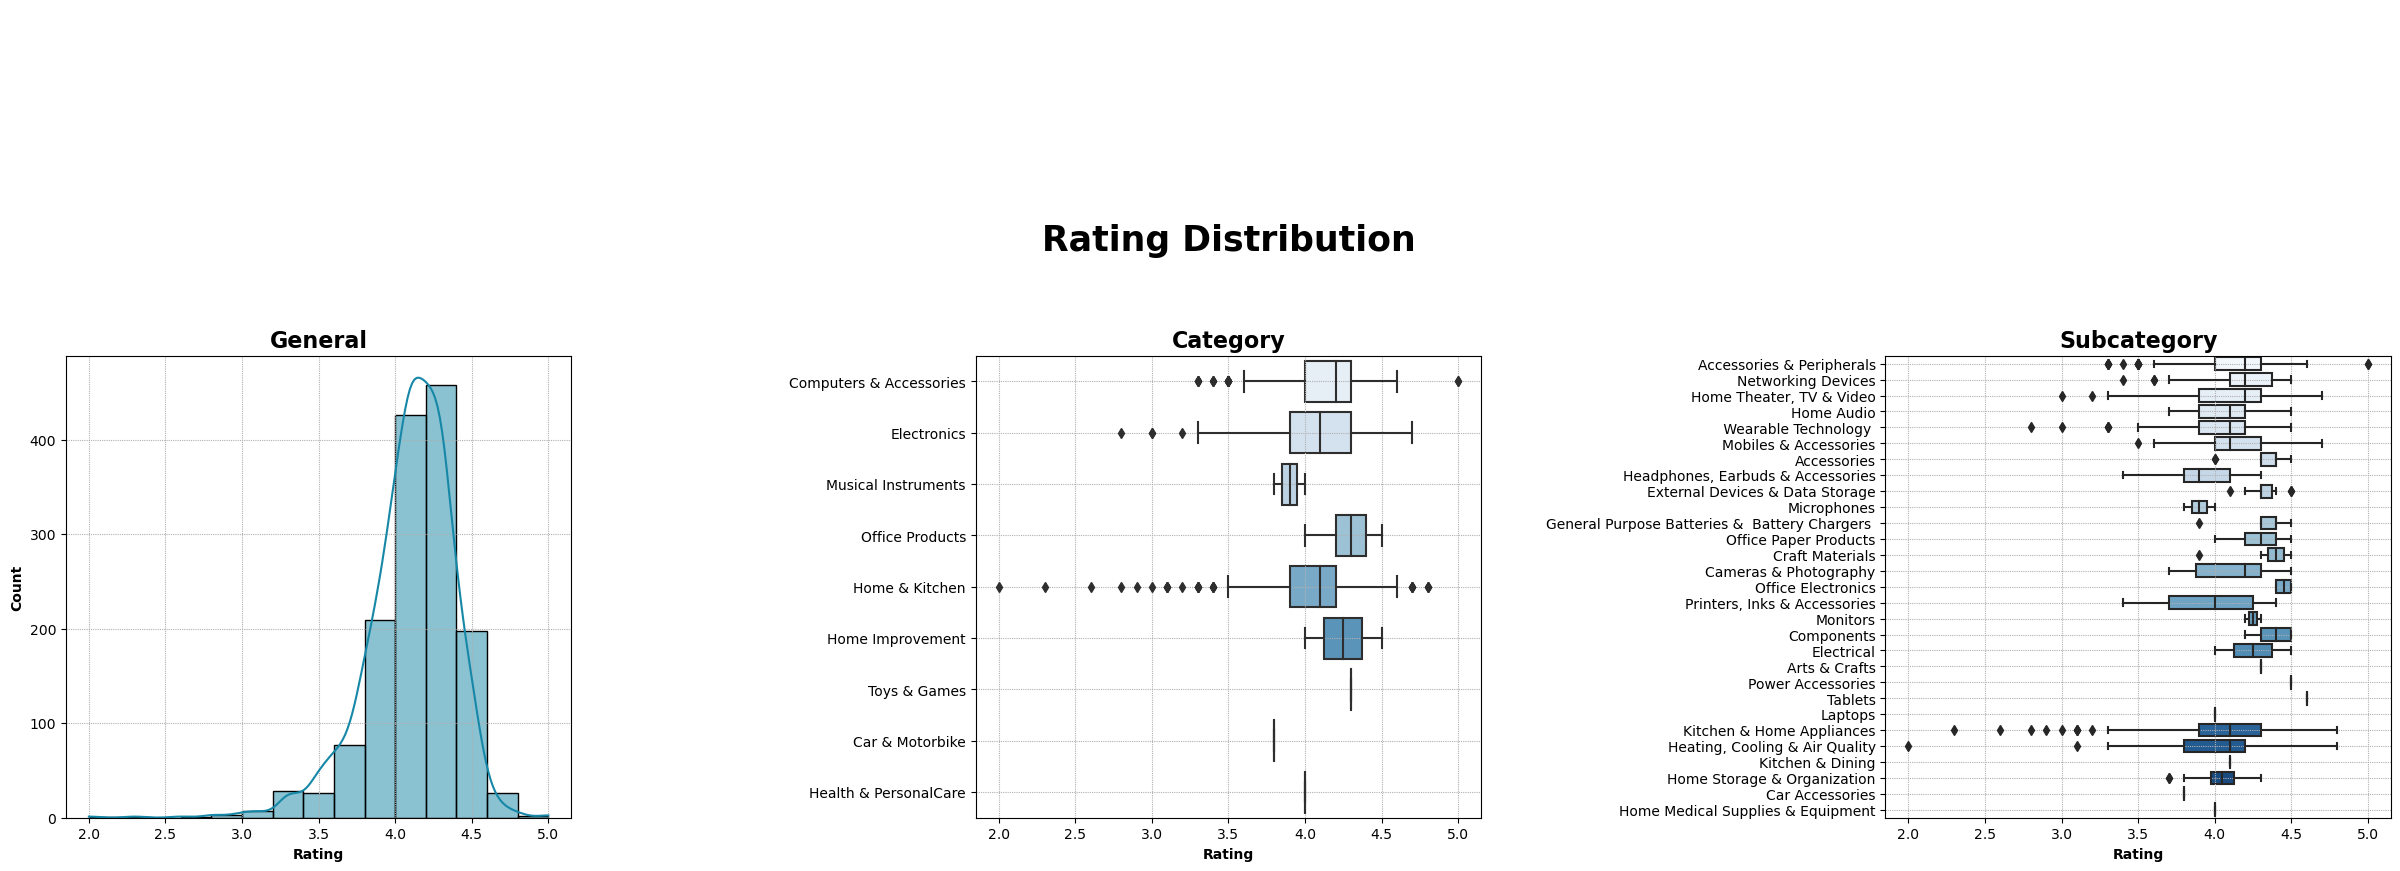

In [27]:
# POSITION
fig = plt.figure(figsize = (30,15))
gs = fig.add_gridspec(nrows = 3, ncols = 3, hspace = -.25, wspace = 0.8)
ax0 = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.5,
        "Rating Distribution",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)

# GENERAL RATING DISTRIBUTION+
ax1.set_title("General",
        fontsize = 16,
        fontweight = "bold",
        loc = "center")
ax1.grid(zorder = 0, dashes = (1,1))
sns.histplot(data = dfc, x = "rating", bins = 15, kde = True, color ="#1687A7", ax = ax1)
ax1.set_ylabel("Count", fontweight = "bold")
ax1.set_xlabel("Rating", fontweight = "bold")


# CATEGORY RATING DISTRIBUTION
ax2.set_title("Category",
        fontsize = 16,
        fontweight = "bold",
        loc = "center")
sns.boxplot(ax=ax2, data=dfc, x='rating', y='category', palette="Blues")
ax2.grid(zorder = 0, dashes = (1,1))
ax2.set_ylabel("")
ax2.set_xlabel("Rating", fontweight = "bold")

# CATEGORY RATING DISTRIBUTION
ax3.set_title("Subcategory",
        fontsize = 16,
        fontweight = "bold",
        loc = "center")
sns.boxplot(ax=ax3, data=dfc, x='rating', y='subcategory', palette="Blues")
ax3.grid(zorder = 0, dashes = (1,1))
ax3.set_ylabel("")
ax3.set_xlabel("Rating", fontweight = "bold")

for i in ["top", "right", "bottom", "left"]:
    ax0.spines[i].set_visible(False)

* The majority of products in the dataset have ratings between 4.0 and 4.39, and there are no products with a rating below 2.0. The distribution of ratings is slightly skewed to the left.

* Products in the Toys & Games, Car & Motorbike, and Health & Personal Care categories typically have ratings between 3.70 and 4.39. Home Improvement and Office Products have the highest minimum rating of 4.0.

* Computer & Accessories and Electronics products have a range of ratings from 3.6 to 4.6, with some products having high ratings of 5.0 and low ratings as low as 2.75. Home & Kitchen products have the most varied rating range, with some products having a high rating of 4.75 and some having the lowest rating of 2.0. 

* However, most products in this category fall within the range of 3.8 to 4.6. Among the sub-categories, Accessories & Peripherals have the highest rated products while Heating, Cooling & Air Quality have the lowest rated products.

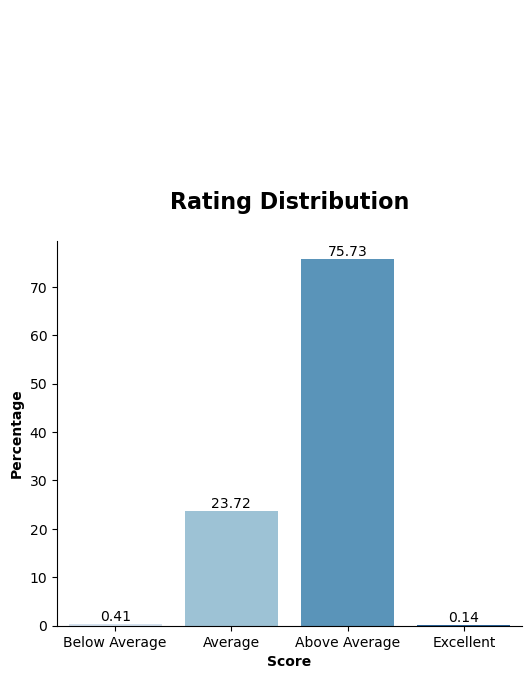

In [28]:
# VARIABLES
o = ["Below Average", "Average", "Above Average", "Excellent"]
c = dfc["rating_score"].value_counts(normalize = True).rename_axis("rating").reset_index(name = "counts")
c["counts"] = c["counts"].round(4) * 100

# POSITION
fig = plt.figure(figsize = (6,8))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.4)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
bakground = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE
ax0.text(0.5, 0.5,
        "Rating Distribution",
        fontsize = 16,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# RATING DISTRIBUTION(%)
sns.barplot(data = c, x = 'rating', y ='counts', order = o, ax = ax1, palette = "Blues")
ax1.bar_label(ax1.containers[0])
ax1.spines[["top", "right"]].set_visible(False)
ax1.set_xlabel("Score", fontweight = "bold")
ax1.set_ylabel("Percentage", fontweight = "bold")

plt.show()


The 75.73% of products have been rated as Above Average, with only a very small number of products being rated as Below Average or Excellent. None of the products have been rated as Low Grade.

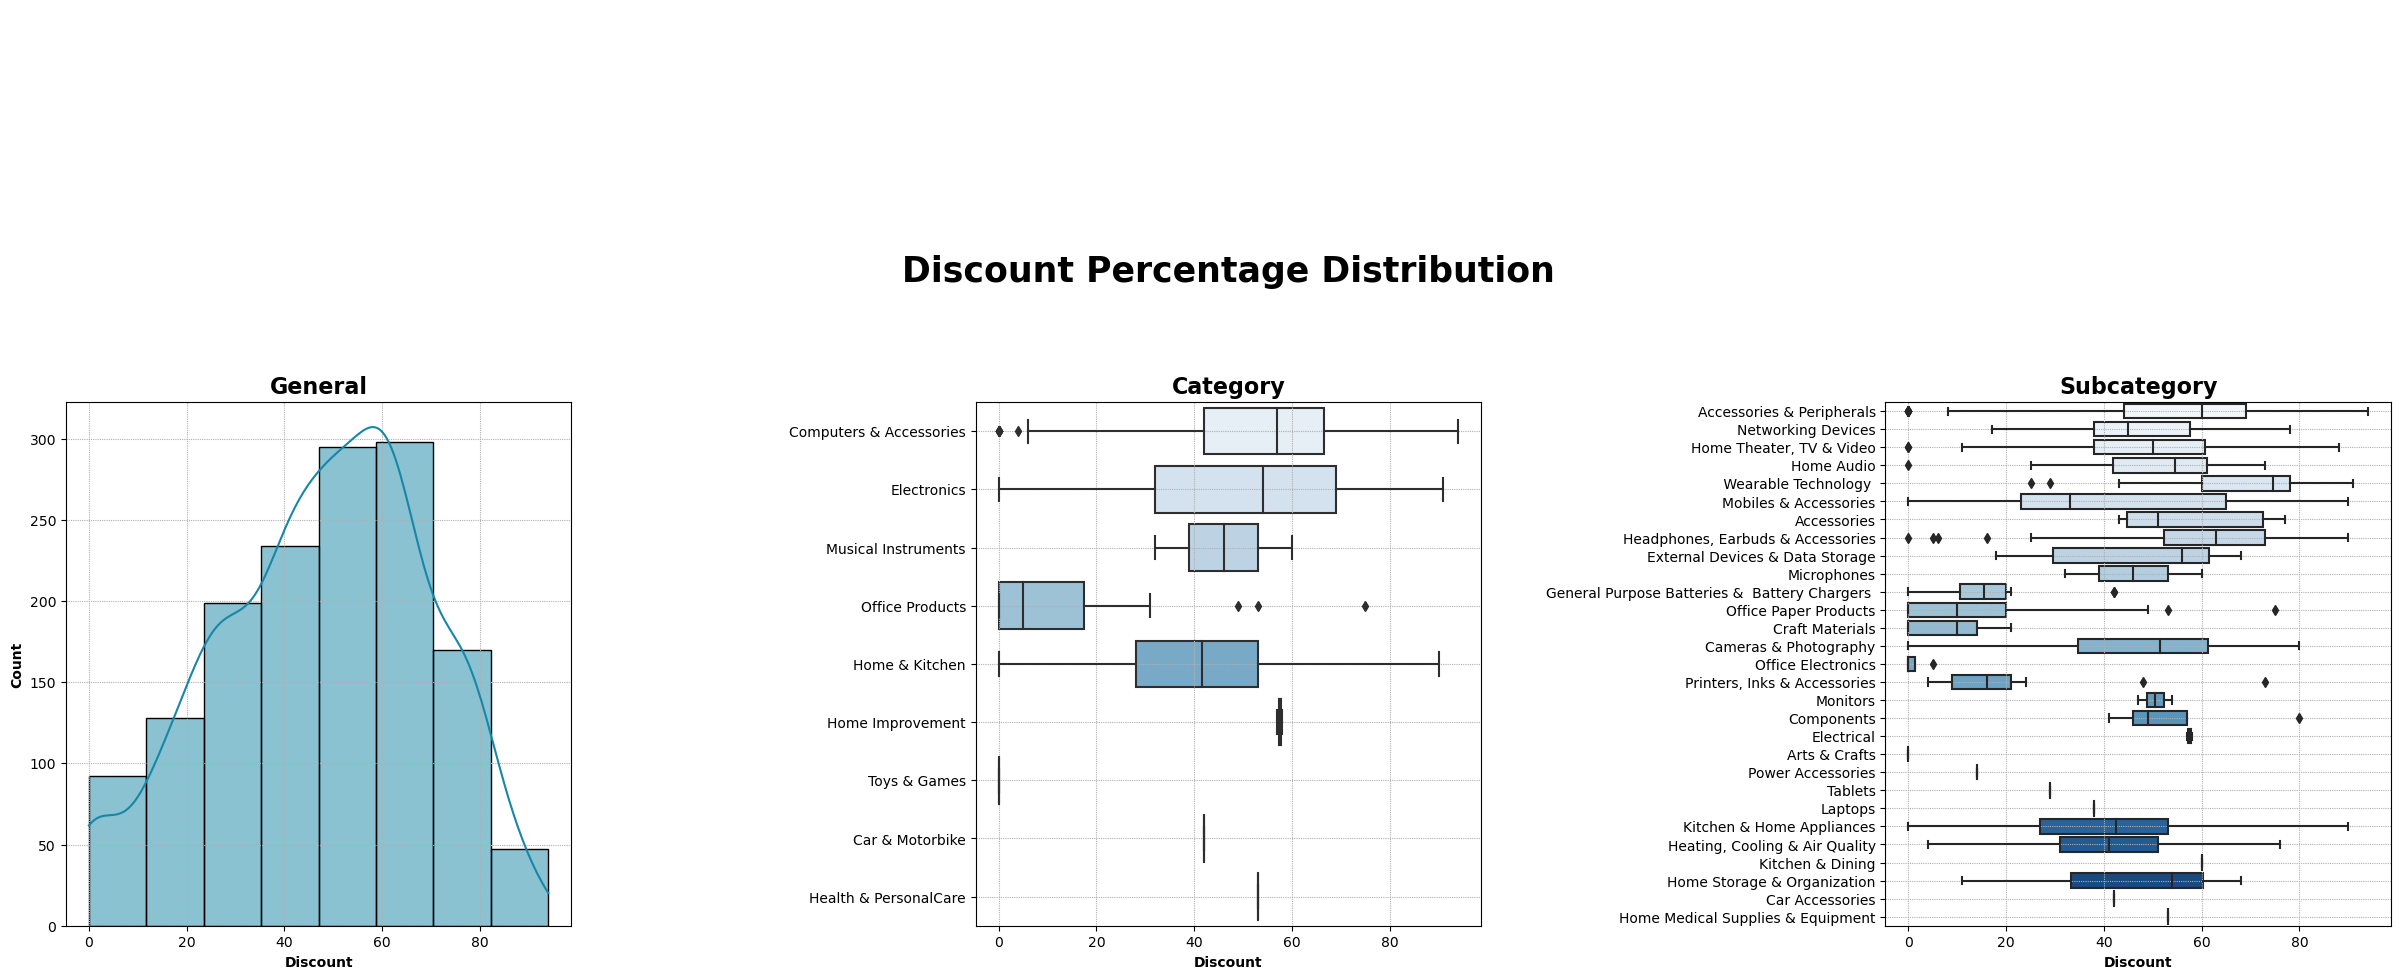

In [29]:
# POSITION
fig = plt.figure(figsize = (30,17))
gs = fig.add_gridspec(nrows = 3, ncols = 3, hspace = -.25, wspace = 0.8)
ax0 = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.5,
        "Discount Percentage Distribution",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)

# GENERAL RATING DISTRIBUTION+
ax1.set_title("General",
        fontsize = 16,
        fontweight = "bold",
        loc = "center")
ax1.grid(zorder = 0, dashes = (1,1))
sns.histplot(data = dfc, x = "discount_percentage", bins = 8, kde = True, color ="#1687A7", ax = ax1)
ax1.set_ylabel("Count", fontweight = "bold")
ax1.set_xlabel("Discount", fontweight = "bold")


# CATEGORY RATING DISTRIBUTION
ax2.set_title("Category",
        fontsize = 16,
        fontweight = "bold",
        loc = "center")
sns.boxplot(ax=ax2, data=dfc, x='discount_percentage', y='category', palette="Blues")
ax2.grid(zorder = 0, dashes = (1,1))
ax2.set_ylabel("")
ax2.set_xlabel("Discount", fontweight = "bold")

# CATEGORY RATING DISTRIBUTION
ax3.set_title("Subcategory",
        fontsize = 16,
        fontweight = "bold",
        loc = "center")
sns.boxplot(ax=ax3, data=dfc, x='discount_percentage', y='subcategory', palette="Blues")
ax3.grid(zorder = 0, dashes = (1,1))
ax3.set_ylabel("")
ax3.set_xlabel("Discount", fontweight = "bold")

for i in ["top", "right", "bottom", "left"]:
    ax0.spines[i].set_visible(False)

* The majority of products have discounts ranging from 50% to 70%. However, the discount variation for Computers & Accessories, Electronics, and Home & Kitchen products is quite large, with discounts ranging from 0% to more than 90%.

* Toys & Games, Cars & Motorbikes, Health & Personal Care, and Home Improvement products have the least variation in discounts. 

* Office Products, compared to other products in the Main Category, do not offer a large amount of discounts.

Now let's see if there is any correlation between the characteristics of the dataset 

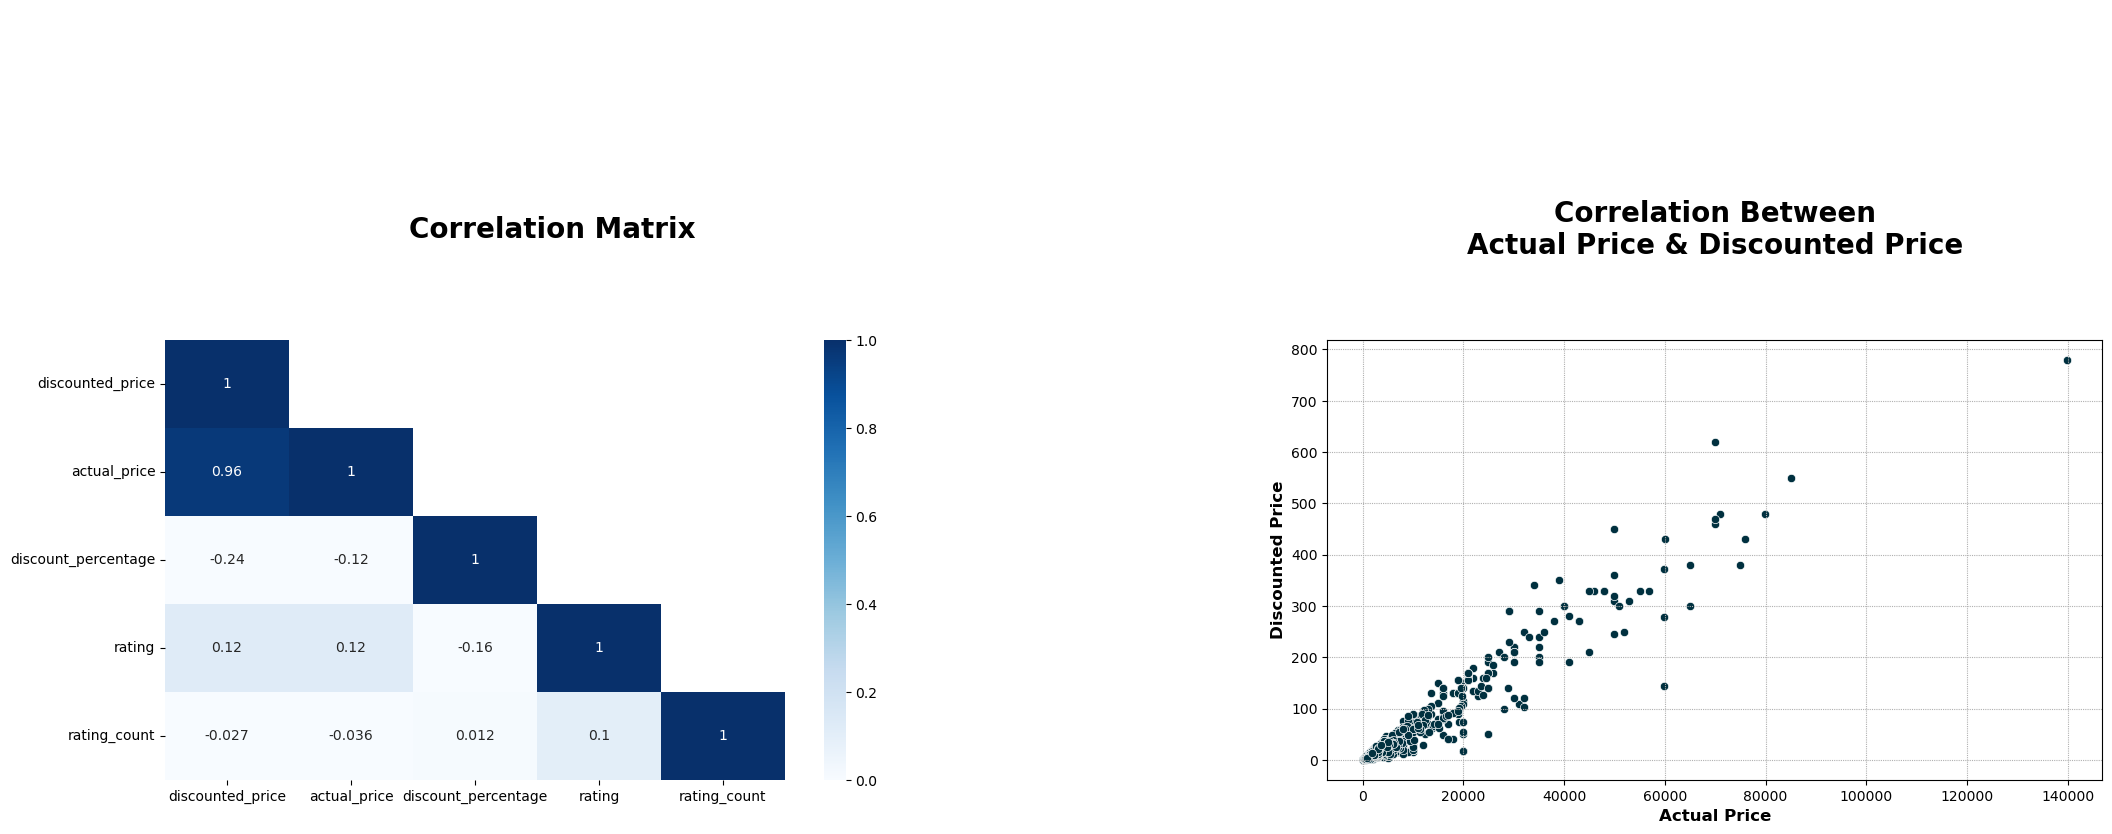

In [30]:
# VARIABLES
corr = df.corr()
mask = np.triu(np.ones_like(corr), k = 1)

# POSITION 
fig = plt.figure(figsize = (25,10))
gs = fig.add_gridspec(nrows = 2, ncols = 2, hspace = -.25, wspace = 0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

# BACKGROUND
background = "white"
ax3.set_facecolor(background)

# TITLE 1
ax0.text(0.5, 0.5,
        "Correlation Matrix",
        fontsize = 20,
        fontweight = "bold",
        verticalalignment = "center",
        horizontalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)

# CORRELATION MARIX
sns.heatmap(corr, annot = True, cmap = "Blues", vmin = 0, vmax = 1, ax = ax2, mask = mask)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize = 10)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize = 10)

# TITLE 1
ax1.text(0.5, 0.5,
        "Correlation Between\nActual Price & Discounted Price",
        fontsize = 20,
        fontweight = "bold",
        verticalalignment = "center",
        horizontalalignment = "center")
ax1.set(xticks = [], yticks = [])
ax1.tick_params(left = False, right = False)

# SCATTERPLOT
sns.scatterplot(data=df, y='discounted_price', x='actual_price', color='#00303F', ax = ax3)
ax3.grid(axis = "both", zorder = 0, dashes = (1,1))
ax3.set_ylabel("Discounted Price", fontsize = 12, fontweight = "bold")
ax3.set_xlabel("Actual Price", fontsize = 12, fontweight = "bold")

for i in ["top", "right", "bottom", "left"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    
plt.show()

The majority of the features within the dataset do not appear to have any significant correlation with one another. However, there is a positive correlation present between the actual prices of products and the discounted prices of products.

It's worth noting that while a positive correlation suggests a relationship between two variables, it doesn't necessarily mean that one variable causes the other. Correlation doesn't equal causation, and other factors could be influencing both variables.

## **Sentiment Analysis**

In [31]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [32]:
sa = df[['product_id','review_title','review_content']]

In [33]:
r = {}

for i, row in tqdm(sa.iterrows(), total=len(sa)):
    review_desc =row['review_content']
    myid = row['product_id']
    r[myid] = sia.polarity_scores(review_desc)

  0%|          | 0/1463 [00:00<?, ?it/s]

In [34]:
ps = pd.DataFrame(r).T
ps = ps.reset_index().rename(columns={'index' : 'product_id'})

ps

,product_id,neg,neu,pos,compound
0,B07JW9H4J1,0.032,0.744,0.224,0.9033
1,B098NS6PVG,0.010,0.821,0.169,0.9853
2,B096MSW6CT,0.000,0.641,0.359,0.6808
3,B08HDJ86NZ,0.028,0.800,0.172,0.8316
4,B08CF3B7N1,0.116,0.719,0.165,0.9809
...,...,...,...,...,...
1344,B08L7J3T31,0.016,0.763,0.221,0.9468
1345,B01M6453MB,0.122,0.714,0.164,0.7876
1346,B009P2LIL4,0.083,0.718,0.199,0.9698
1347,B00J5DYCCA,0.061,0.882,0.057,-0.2960


In [35]:
sa = dfc.merge(ps, how='left')

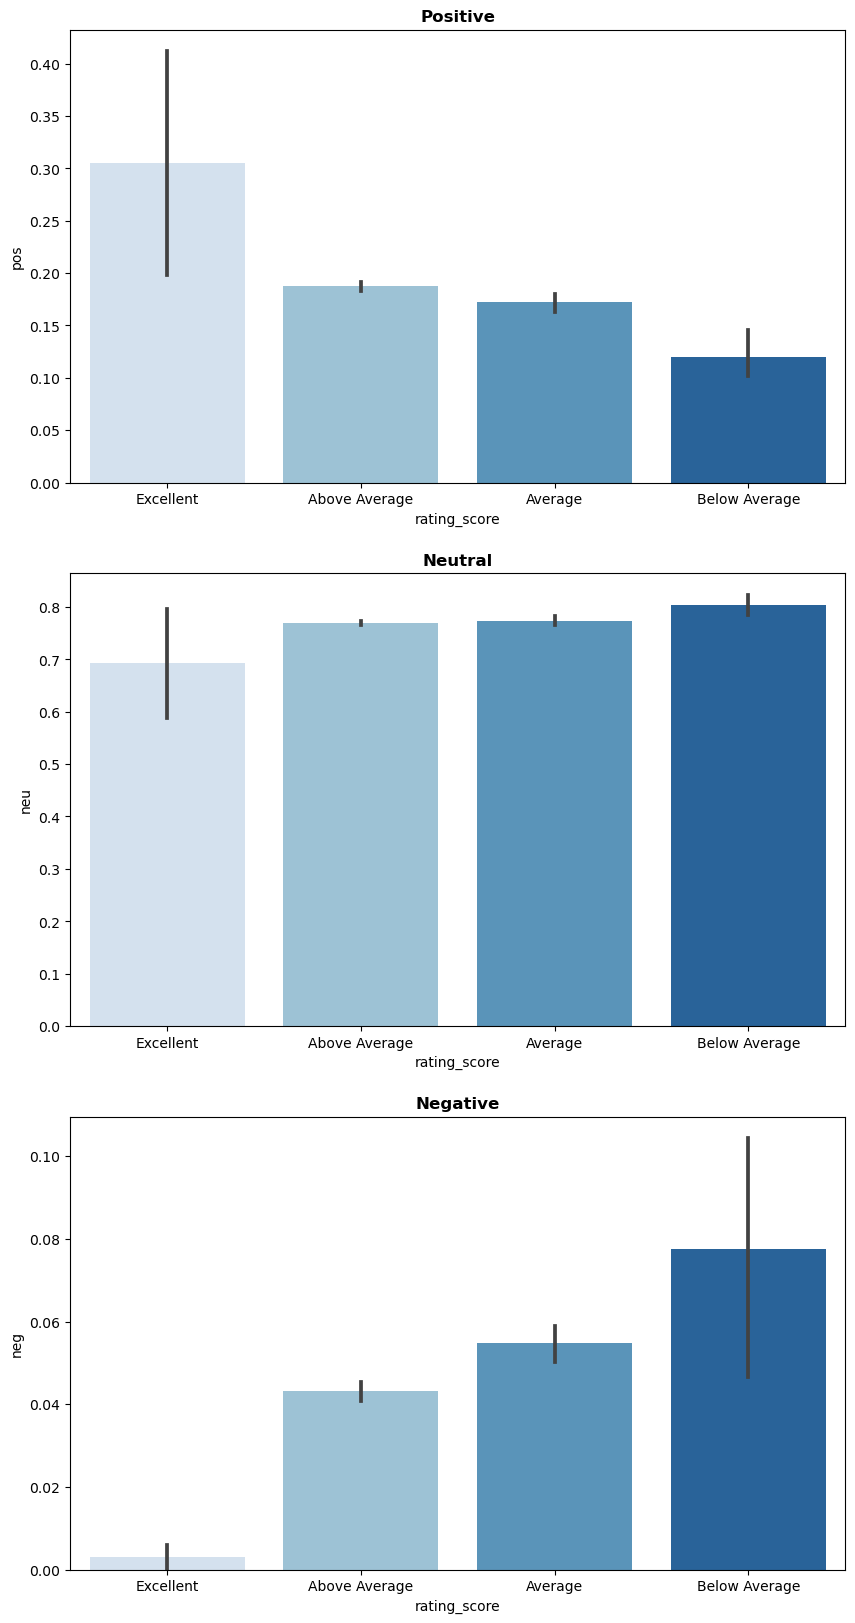

In [36]:

fig, ax = plt.subplots(3,1, figsize=(10,20))

sns.barplot(data=sa, x='rating_score', y='pos', ax=ax[0], palette = "Blues")
sns.barplot(data=sa, x='rating_score', y='neu', ax=ax[1], palette = "Blues")
sns.barplot(data=sa, x='rating_score', y='neg', ax=ax[2], palette = "Blues")

ax[0].set_title('Positive', fontweight = 'bold')
ax[1].set_title('Neutral', fontweight = 'bold')
ax[2].set_title('Negative', fontweight = 'bold')



plt.show()

The Sentiment Analysis reveals that as the rating increases, there is a noticeable rise in the usage of positive words in reviews.

Conversely, there is a significant decrease in the usage of negative words in reviews as the rating goes up.






In [37]:
score = sa[['pos', 'neu', 'neg', 'compound']]
score.describe()[1:7]

,pos,neu,neg,compound
mean,0.183532,0.770547,0.045928,0.820205
std,0.074166,0.071677,0.037702,0.368118
min,0.000000,0.465000,0.000000,-0.982100
25%,0.132000,0.727000,0.020000,0.870750
50%,0.174000,0.780000,0.041000,0.961600
75%,0.225000,0.819000,0.064000,0.988750


Based on our analysis, it can be inferred that the majority of reviewers provide highly positive reviews, as indicated by an average compound score of 96%.




